# Estadistica Descriptiva

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 9 de Octubre del 2020_

La estadistica descriptiva tiene como objetivo **resumir** y **presentar** los datos, seaan estos de la **poblacion total** o una **muestra** de ella <br><br>
En este tutorial revisaremos los conceptos fundamentales en esta area, los cuales pueden agruparse en tres ramas principales:
- Medidas de tendencia central
- Medidas de dispersion

La estadistica descriptiva es el primer paso en la exploracion de datos. Nos permite ver como estos se distribuyen y hace hipotesis al respecto.

En este tutorial utilizaremos la libreria de python ```pandas```, la cual fue presentada en el [tutorial pasado](https://github.com/cridonoso/IntroToDataScience/blob/master/0-Python/Python.ipynb)

In [1]:
import pandas as pd # importamos la libreria

He descargado la <ins>tabla de personas</ins> de la *Encuesta de Presupuestos Familiares* (EPF) [desde la pagina del INE](https://www.ine.cl/estadisticas/sociales/ingresos-y-gastos/encuesta-de-presupuestos-familiares). En este tutorial describiremos los datos utilizando los conceptos previamente definidos

In [2]:
epf_gastos = pd.read_csv('base-personas-viii-epf-(formato-csv).csv', 
                    delimiter=';', # porque el separador del csv no son "," (comas)
                    low_memory=False) # Porque la tabla contiene distintos tipos de datos

La columna ```ING_TOTAL_HOG_HD``` contiene el gasto total de los hogares. Sin embargo, el formato de los datos son de tipo `Object` lo cual imposibilita extraer estadisticos descriptivos. 

In [3]:
epf_gastos['ING_TOTAL_HOG_HD'].dtype

dtype('O')

Primero reemplazamos la ',' coma '.' por un punto

In [4]:
epf_gastos['ING_TOTAL_HOG_HD'] = epf_gastos['ING_TOTAL_HOG_HD'].str.replace(',','.')

Luego cambiamos el tipo de dato a `float` flotante

In [5]:
epf_gastos['ING_TOTAL_HOG_HD'] = epf_gastos['ING_TOTAL_HOG_HD'].astype(float) 

In [6]:
epf_gastos['ING_TOTAL_HOG_HD'].dtype

dtype('float64')

Alternativamente, en caso de no querer alterar la columna original podemos crear una nueva columna con los valores actualizados 

In [7]:
epf_gastos['ingresoTotal'] = epf_gastos['ING_TOTAL_HOG_HD'].astype(float) 

In [8]:
epf_gastos.iloc[:3, -3:] # selecionamos las primeras 3 filas y columnas

,TE09,TE10_HOG,ingresoTotal
0,2,-77,1588000.0
1,2,-77,1588000.0
2,2,-77,1588000.0


Ahora podemos calcular nuestros estadisticos descriptivos

In [9]:
media_ingreso = epf_gastos['ingresoTotal'].mean()
print('Media Ingreso: ${:.2f}'.format(media_ingreso))

Media Ingreso: $1462937.64


In [10]:
mediana_ingreso = epf_gastos['ingresoTotal'].median()
print('Mediana Ingreso: ${:.2f}'.format(mediana_ingreso))

Mediana Ingreso: $955675.00


In [11]:
moda_ingreso = epf_gastos['ingresoTotal'].mode().values[0]
print('Moda Ingreso: ${}'.format(moda_ingreso))

Moda Ingreso: $500000.0


Como podemos darnos cuenta, los <u>valores centrales</u> para la columna `ingresoTotal` no es igual. **Debemos tener mucho cuidado a la hora de utilizar estos estadisticos para contestar o validar una hipotesis** <br> <br> 
<span style="color:red">Cual el ingreso promedio de las familias chilenas? <span>

Ahora, analicemos los datos nuevamente, pero siendo mas rigurosos. Por ejemplo, podriamos estudiar la diferencia entre el <u>ingreso maximo y minimo</u> entre todas las familias. Para ello debemos calcular **el rango** de `ingresoTotal`

In [12]:
rango_ingreso = epf_gastos['ingresoTotal'].max() - epf_gastos['ingresoTotal'].min()
print('Rango Ingreso: ${}'.format(rango_ingreso))

Rango Ingreso: $62080830.0


Existe una diferencia de un poco mas de 62 millones!. Con esto podemos ver una primera aproximacion de la <u>dispersion</u> de los datos.

Ahora bien, ya que conocemos la media, podriamos ver que tan cerca se encuentran los datos de ella -es probable que en nuestra distribucion hayan valores atipicos (*del ingles, outliers*)

Para calcular que tanto se alejan los datos de la media, simplemente calculamos el promedio entre las distancias de cada punto con la media aritmetica <br><br>
Sea $X$ el conjunto de todos los presupuestos familiares y $x_i$ la i-esima muestra de ese conjunto, la distancia promedio entre los puntos estara definida por: <br>
<center>
$\frac{1}{N-1}\sum_{i=0}^{N-1} (x_i - \hat{x})^2$
</center><br>
donde $N$ es la cantidad de presupuestos y $\hat{x}$ es la media de los presupuestos. <u>Note que la distancia siempre debe ser positiva</u>. 

El valor que acabamos de calcular es conocido como **varianza** y la raiz cuadrada de esta corresponde a la **desviacion estandar**.<br><br>
<span style="color:red">En que casos utilizarias la desviacion estandar?<span>

Ahora, calculemos la varianza y desviacion estandar en Pandas

In [13]:
varianza_ingreso = epf_gastos['ingresoTotal'].var()
print('Varianza Ingreso: {:.2f}'.format(varianza_ingreso))

Varianza Ingreso: 3067507480673.77


In [14]:
std_ingreso = epf_gastos['ingresoTotal'].std()
print('Desviacion Estandar Ingreso: ${:.2f}'.format(std_ingreso))

Desviacion Estandar Ingreso: $1751430.12


Un estudio interesante seria ordenar los datos e ir viendo el ingreso maximo por porcentaje de la poblacion. Este medida se conoce como percentil, y en pandas podemos calcularlo utilizando `quantile`

In [15]:
epf_gastos['ingresoTotal'].quantile([.25, .5, .75]).astype(int)

0.25     548740
0.50     955675
0.75    1691342
Name: ingresoTotal, dtype: int64

<span style="color:red"> Que podemos decir de esta informacion?<span>

En resumen, pandas nos permite realizar todos los calculos necesarios para hacer estadistica descriptiva. Mas aun, esta libreria tiene un metodo el cual nos entrega un resumen de los <u>estadisticos descriptivos<u> mas importantes en el dataframe:  `describe()` 

In [16]:
epf_gastos['ingresoTotal'].describe().astype(int) #.astype(int) para visualizar mejor los valores

count       48308
mean      1462937
std       1751430
min             0
25%        548740
50%        955675
75%       1691342
max      62080830
Name: ingresoTotal, dtype: int64

El ingreso de las familias chilenas durante el 2018 varia bastante. Es mas, desde nuestro estudio, podemos observar presencia de valores atipicos extremos que alteran el valor de la media. Si quisieramos estudiar la realidad promedio de las familias chilenas la mediana es una mejor opcion. Sin embargo.... 

Voy a mostrar algunas columnas de la tabla de nuevamente

In [17]:
epf_gastos[['FOLIO', 'NPERSONAS', 'ingresoTotal']].head()

,FOLIO,NPERSONAS,ingresoTotal
0,00001-1,4,1.588000e+06
1,00001-1,4,1.588000e+06
2,00001-1,4,1.588000e+06
3,00001-1,4,1.588000e+06
4,00002-1,1,6.700604e+05


<span style="color:red"> Que puedes decir del analisis que acabamos de hacer?<span>

`ING_TOTAL_HOG_HD`: "*Corresponde  a  la  <u>sumatoria</u>  de  todas  las  fuentes  habituales  de  ingreso  del  hogar percibidos en el <u>mes anterior a la aplicación de la encuesta<u/>*" ([Diccionario de Variables, INE 2018](https://www.ine.cl/docs/default-source/encuesta-de-presupuestos-familiares/bbdd/viii-epf---(junio-2016---julio-2017)/diccionario-de-variables-viii-encuesta-de-presupuestos-familiares-(epf).pdf?sfvrsn=4de1bd06_2))

#### Calculando ....

Para calcular el nuevo valor percapita utilizaremos la funcion `apply` la cual nos permite ejecutar una funcion sobre una columna o fila ([mas informacion aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas-dataframe-apply))

In [18]:
funcion = lambda x: x['ingresoTotal']/x['NPERSONAS']
epf_gastos['ingresoPerCapita'] = epf_gastos.apply(funcion, axis=1)

In [19]:
epf_gastos[['FOLIO', 'NPERSONAS', 'ingresoTotal', 'ingresoPerCapita']].head()

,FOLIO,NPERSONAS,ingresoTotal,ingresoPerCapita
0,00001-1,4,1.588000e+06,397000.000000
1,00001-1,4,1.588000e+06,397000.000000
2,00001-1,4,1.588000e+06,397000.000000
3,00001-1,4,1.588000e+06,397000.000000
4,00002-1,1,6.700604e+05,670060.416667


Ahora tiene mas sentido hablar del ingreso promedio de los chilenos

<span style="color:red"> Cual es el ingreso medio de los chilenos y chilenas?<span>

<span style="color:red"> Que porcentaje de la poblacion percibe un ingreso menor al minimo bruto (i.e., $320.500)<span>

Por ultimo, la estadistica descriptiva nos entrega valores representativos de una poblacion o muestra. Utilizando medidas de *tendencia central o dispersion* somos capaces de caracterizar y analizar <u>el contexto puntual</u> de los datos.<br><br> En general, en ciencia de datos nosotros **asumimos** que los **fenomenos y/o eventos** de nuestro entorno **persiguen una distribucion**. Si conocemos la distribucion podemos hacer estadistica inferencial.

Por ejemplo, cual es la probabilidad de que en cinco años no existan personas que vivan con menos del sueldo minimo en chile? <br>
Para contestar esta pregunta debemos conocer la **distribucion de ingresos** en el **tiempo** la cual no es tan facil de saber a priori, pero durante el curso aprenderemos como.

Por mientras podemos visualizar la distribucion de los valores que acabamos de utilizar:

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def freedman_diaconis(serie):
    '''    
    Calcula la cantidad de bins para un histograma dado un conjunto de muestras
    
    Arguments:
        serie {[Pandas serie]} -- [Columna con valores]
    
    Returns:
        [int] -- bins
    
    '''
    percentil = serie.quantile([.25, .75])
    IQR = percentil[0.75] - percentil[0.25]
    bins = int(2*IQR/serie.shape[0]**(1/3))
    return bins

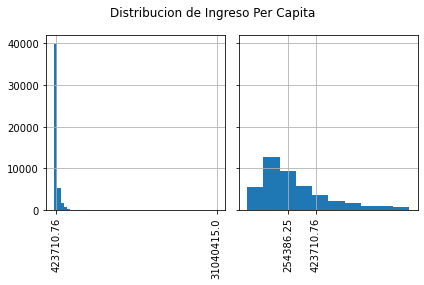

In [22]:
fig, axes = plt.subplots(1,2,sharey=True)
bins = freedman_diaconis(epf_gastos['ingresoPerCapita'])
axes[0].hist(epf_gastos['ingresoPerCapita'], bins=50)
axes[0].grid()
axes[0].set_xticks([epf_gastos['ingresoPerCapita'].mean() , 
            epf_gastos['ingresoPerCapita'].max()])
axes[0].set_xticklabels([np.round(epf_gastos['ingresoPerCapita'].mean(), 2), 
                         np.round(epf_gastos['ingresoPerCapita'].max(), 2)], 
                        rotation=90)
# ==========================
col_pib = epf_gastos['ingresoPerCapita']

no_outliers = col_pib[(col_pib > 0) & (col_pib < 1e6)]

axes[1].hist(no_outliers)
axes[1].set_xticks([epf_gastos['ingresoPerCapita'].median(), 
                    epf_gastos['ingresoPerCapita'].mean()])

axes[1].set_xticklabels([np.round(epf_gastos['ingresoPerCapita'].median(), 2), 
                         np.round(epf_gastos['ingresoPerCapita'].mean(), 2)],
                       rotation=90)
axes[1].grid()

fig.suptitle('Distribucion de Ingreso Per Capita')
fig.tight_layout()
plt.show()

### Teorema del Limite Central

El teorema del limite central establece que la media de muestras (de tamaño suficientemente grande) tiende a una distribucion normal, independiente de la distribucion de la variable aleatoria que estemos midiendo.
<br>
Las supuestos necesarios para que se cumpla este teorema son:
- Las muestras deben ser aleatorias
- Los datos deben ser independientes entre si. 

Supongamos una variable aleatoria la cual sigue una distribucion exponencial 

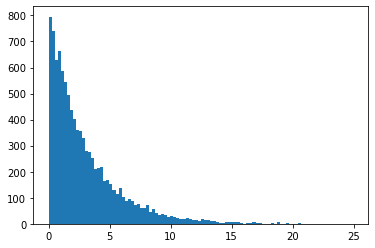

In [23]:
n_samples = 10000
scale = 3 # lambda = 1/scale
data = np.random.exponential (scale, n_samples) 
plt.hist(data,  bins=100)
plt.show()

Ahora sacaremos `M` muestras de tamaño `n_muestra` y guardaremos la media 

In [24]:
M = 1000
n_muestra = 1000

medias = []
for iteracion in range(M):
    muestra = np.random.choice(data, n_muestra, replace=True)
    media_muestra = np.mean(muestra)
    medias.append(media_muestra)

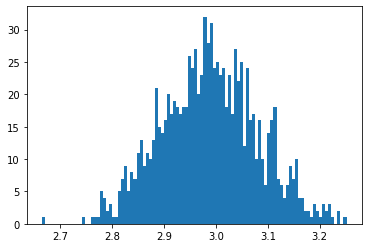

In [25]:
plt.hist(medias,  bins=100)
plt.show()

Podemos ver una distribucion normal la cual tiene meadia y desviacion igual a:

In [26]:
print('mu: {:.2f} - sigma: {:.2f}'.format(np.mean(medias), np.std(medias)))

mu: 2.99 - sigma: 0.09


y comparando con la teorica

In [27]:
sigma_teorico = scale/np.sqrt(n_muestra)
print('mu: {:.2f} - sigma: {:.2f}'.format(scale, sigma_teorico))

mu: 3.00 - sigma: 0.09


Ahora intentemos con los datos de presupuestos familiares 

In [31]:
data = epf_gastos['ingresoPerCapita']

M = 1000 # Numero de muestras
n_muestra = 4000 # tamano de la muestra

medias = []
for iteracion in range(M):
    muestra = np.random.choice(data, n_muestra, replace=True)
    media_muestra = np.mean(muestra)
    medias.append(media_muestra)

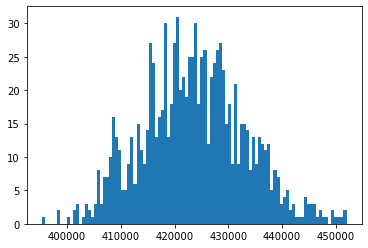

In [35]:
plt.hist(medias, bins=100)
plt.show()

In [32]:
print('mu: {:.2f} - sigma: {:.2f}'.format(np.mean(medias), np.std(medias)))

mu: 423595.68 - sigma: 9551.01


In [33]:
print('mu: {:.2f} - sigma: {:.2f}'.format(np.mean(epf_gastos['ingresoPerCapita']), 
                                          np.std(epf_gastos['ingresoPerCapita'])))

mu: 423710.76 - sigma: 586252.53


<span style="color:red"> Porque el error entre la std empirica y teorica son distintas?<span>